# Project

### Project Title: Car price prediction
#### Done By: Phillip Sethole

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
 <a href=#cont>Back to Table of Contents</a>

##### Introduction

The automobile industry is one of the most significant contributors to the global economy. With the surge in demand for both new and used cars, understanding the factors that determine car prices is essential for consumers, manufacturers, and resellers. Predicting car prices accurately can help customers make informed purchase decisions, aid manufacturers in pricing strategies, and assist resellers in maximizing profits.

This project aims to use data science techniques to analyze car attributes and build a machine learning model capable of predicting car prices. The project will also uncover insights into how various features, such as mileage, age, and horsepower, influence car value.

##### Problem Statement

The car market is highly dynamic, with prices influenced by numerous factors like make, model, age, mileage, and features. Traditional methods of determining car prices often rely on manual appraisals, which can be subjective and inconsistent.

This creates a need for a data-driven approach to predict car prices accurately. The challenge is to build a model that can:

- Handle the diversity of car features.
- Account for non-linear relationships between features and prices.
- Provide explainable predictions for better decision-making.

#####  Objectives


Develop a Machine Learning Model:

- Build and evaluate a regression model to predict car prices based on their features.
  
Feature Analysis:

- Identify and quantify the influence of various features (e.g., brand, age, mileage, and horsepower) on car prices.

Provide Insights:

- Offer actionable insights for buyers, sellers, and manufacturers based on the model's output and feature importance.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>


---

To carry out data cleaning, manipulation, and visualization, we’ll use the following Python libraries:

- pandas: Provides data structures and functions needed to efficiently clean and manipulate the dataset.
- numpy: Adds support for numerical operations, including handling arrays and mathematical functions for outlier treatment.
- matplotlib and seaborn: Libraries for data visualization. matplotlib is a core plotting library, while seaborn builds on it to provide more aesthetic 

In [10]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>


---

#### Data Collection
The dataset used in this project contains car price listings collected from Kaggle.
It provides detailed information about various car models, their specifications, and selling prices


Dataset Source
Kaggle - Car Price Prediction Dataset
Link: https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset/.

#### Description

Key features:

- Car_Name: Identify the brand or company name along with the specific model of each vehicle.
- Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
- Selling_Price: Selling price of car
- Present_Price: Current origin price of car
- Kms_Driven: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
- Fuel_Type: Learn about the type of fuel the vehicles run on, whether it's petrol or diesel.
- Seller_Type: Seller type weather dealer or individual
- Transmission: Determine the transmission type, whether automatic, manual, or another variant.
- Owner: How many owner of car (0, 1, 2, or 3

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>


---

The data used for this project was located in the car_prediction_data.csv file. To better manipulate and analyse the car_prediction_data.csv file, it was loaded into a Pandas Data Frame using the Pandas function, .read_csv().

In [12]:
# loading dataset
df = pd.read_csv("car_prediction_data.csv", index_col=False)

In [14]:
# Displays the number of rows and columns
df.shape

(301, 9)

Results : The dataset consists of 301 rows (observations) and 9 columns (features).

In [16]:
## Display summary information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>


---

#### Handle Missing Values
We'll use .isnull() to detect missing values and .sum() to count them.

In [20]:
missing_values = df.isnull().sum()

# Display Missing Values Count
print("Missing values in each column:")
display(missing_values)

# If the output shows that all columns have zero missing values, it means the dataset is clean.
if missing_values.sum() == 0:
    print("\nOur dataset has no missing values!")
else:
    print("\nOur dataset hasmissing values. Further cleaning is needed.")

Missing values in each column:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


Our dataset has no missing values!


#### Remove Duplicates
We'll use the .duplicated() method to check for duplicate rows in the dataset.

In [22]:
duplicates = df.duplicated()

# Display Number of Duplicate Rows
print("Number of duplicate rows in the dataset:", duplicates.sum())

# If duplicates are found, we can remove them
if duplicates.sum() > 0:
    print("\nRemoving duplicate rows...")
    df_cleaned = df.drop_duplicates()
    print(f"Dataset shape before: {df.shape}")
    print(f"Dataset shape after: {df_cleaned.shape}")
else:
    print("\nNo duplicate rows found. The dataset is unique!")

Number of duplicate rows in the dataset: 2

Removing duplicate rows...
Dataset shape before: (301, 9)
Dataset shape after: (299, 9)


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>


---


#### Selling Price Distribution

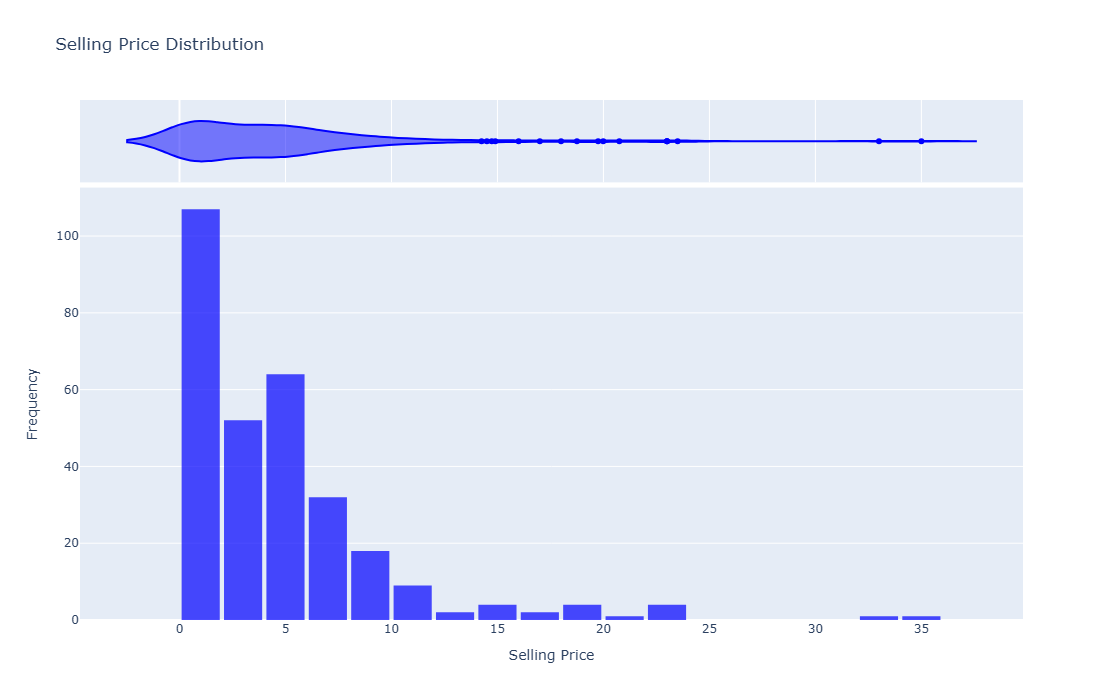

In [78]:
import plotly.express as px

fig = px.histogram(df, x='Selling_Price', nbins=30, 
                   marginal='violin',  
                   opacity=0.7,
                   color_discrete_sequence=['blue'],
                   title='Selling Price Distribution',
                   labels={'Selling_Price': 'Selling Price'})

fig.update_layout(
    yaxis_title='Frequency',
    bargap=0.1,
    showlegend=False,
    height=700,  
    width=800    
)

fig.show()

####  Present Price vs Selling Price

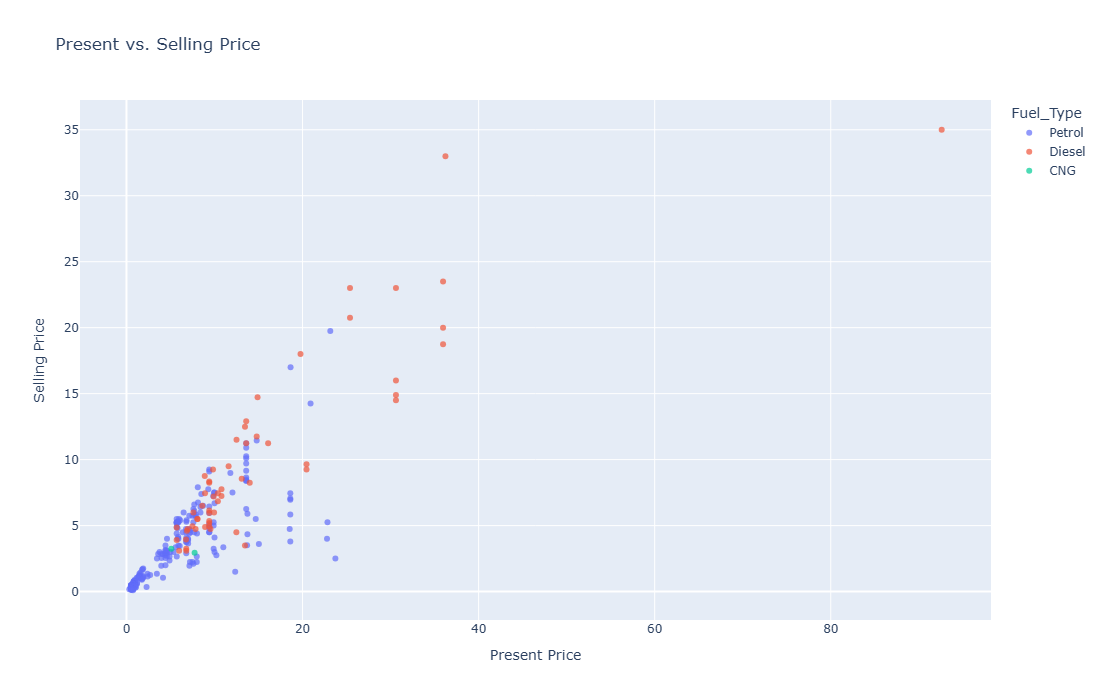

In [76]:
fig = px.scatter(df_cleaned, 
                 x='Present_Price', 
                 y='Selling_Price', 
                 color='Fuel_Type',
                 opacity=0.7,
                 title='Present vs. Selling Price',
                 labels={
                     'Present_Price': 'Present Price',
                     'Selling_Price': 'Selling Price'
                 },
                 width=800,
                 height=700)

fig.show()

#### Selling Price Distribution by Fuel Type

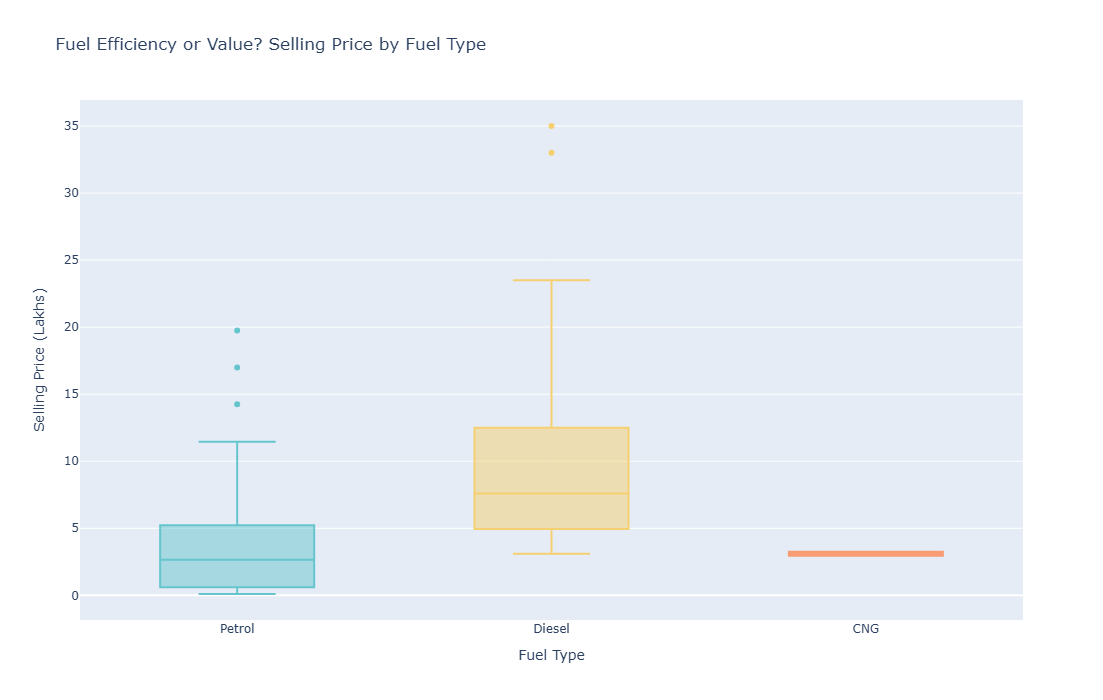

In [74]:
fig = px.box(df_cleaned, 
             x='Fuel_Type', 
             y='Selling_Price',
             color='Fuel_Type',
             color_discrete_sequence=px.colors.qualitative.Pastel,  # muted palette equivalent
             title='Fuel Efficiency or Value? Selling Price by Fuel Type',
             labels={
                 'Fuel_Type': 'Fuel Type',
                 'Selling_Price': 'Selling Price (Lakhs)'
             },
             width=800,
             height=700)

fig.update_layout(showlegend=False)  # Remove legend as x-axis already shows fuel types
fig.show()

#### Dealer vs. Individual

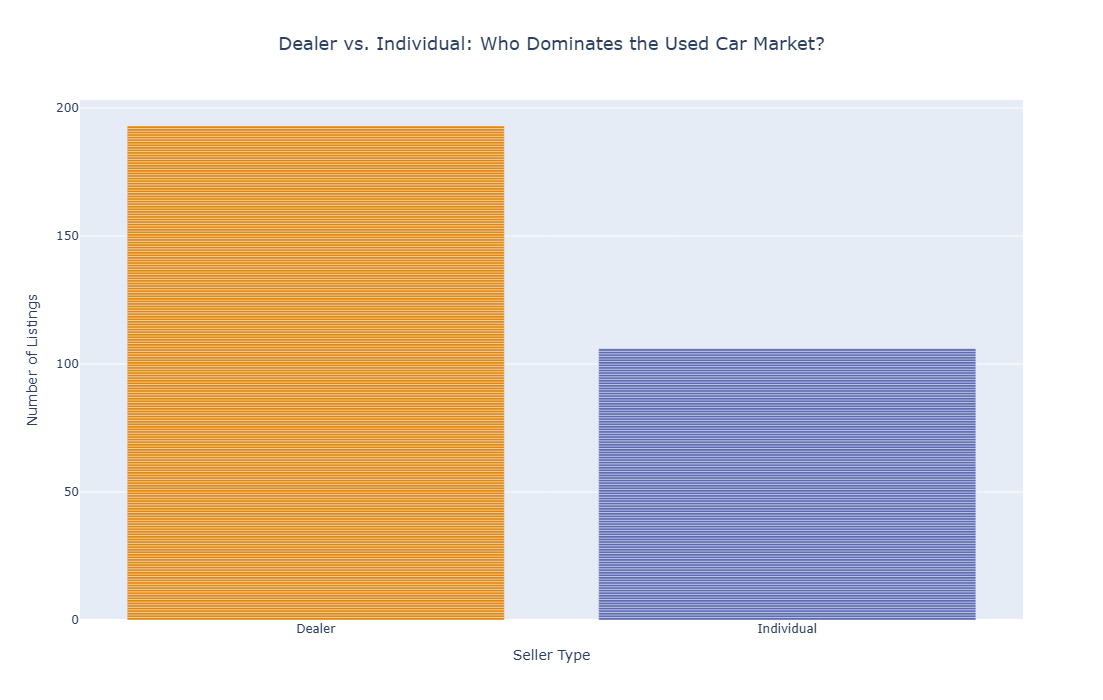

In [72]:
fig = px.bar(
    df_cleaned,
    x='Seller_Type',
    color='Seller_Type',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='Dealer vs. Individual: Who Dominates the Used Car Market?', 
    labels={'Seller_Type': 'Seller Type', 'count': 'Number of Listings'},
    width=800,
    height=700,
)

fig.update_layout(
    showlegend=False,
    title_font_size=18,
    title_x=0.5,  
    hovermode="x",  
)
fig.show()

#### Analyzing Selling Price Distributions by Seller Type

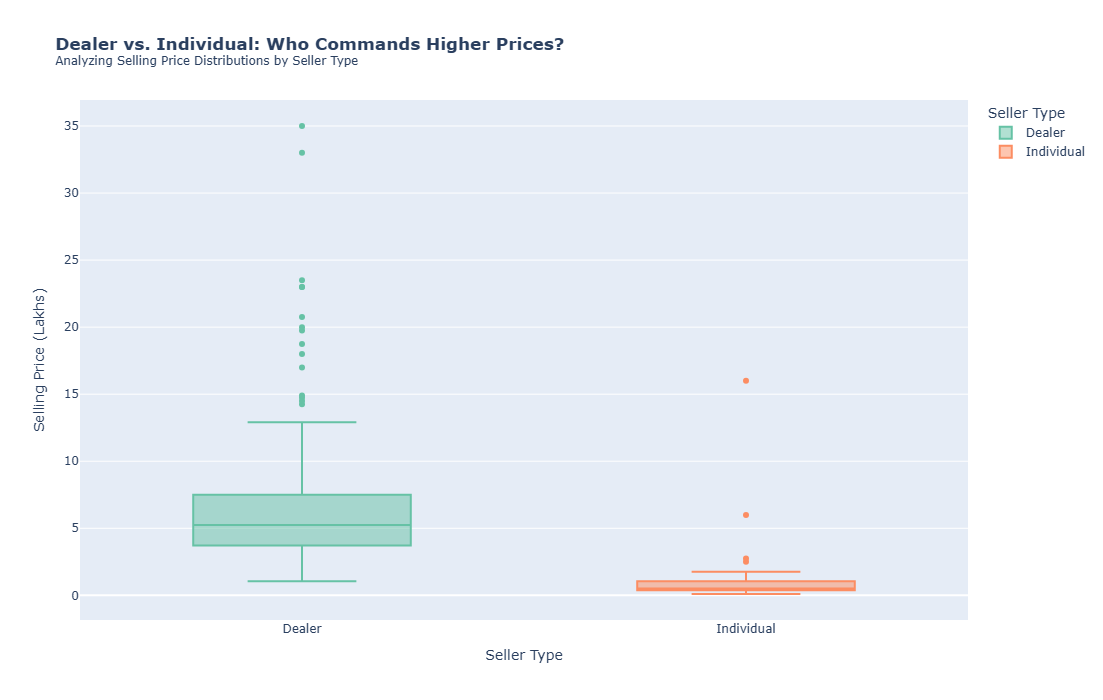

In [70]:
fig = px.box(
    df_cleaned,
    x="Seller_Type",
    y="Selling_Price",
    color="Seller_Type",
    color_discrete_sequence=px.colors.qualitative.Set2,  # Matches 'Set2' palette
    title="<b>Dealer vs. Individual: Who Commands Higher Prices?</b><br><sup>Analyzing Selling Price Distributions by Seller Type</sup>",
    labels={"Seller_Type": "Seller Type", "Selling_Price": "Selling Price"},
    width=800,
    height=700,
)

fig.show()

#### Manual vs Automatic

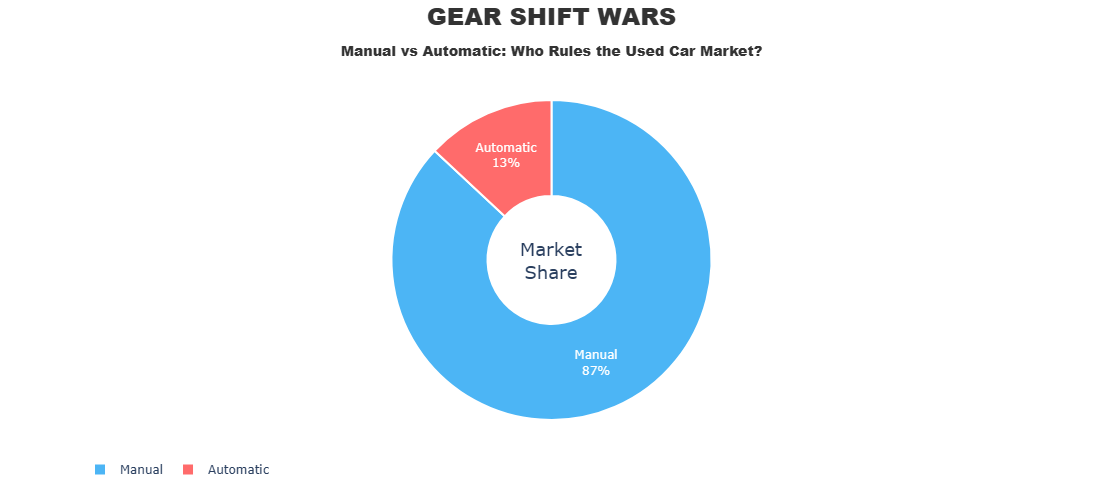

In [85]:
fig = px.pie(
    df_cleaned,
    names='Transmission',
    color='Transmission',
    color_discrete_sequence=['#4CB5F5', '#FF6B6B'],  
    title='<b>GEAR SHIFT WARS</b><br><span style="font-size:14px">Manual vs Automatic: Who Rules the Used Car Market?</span>',
    width=600,
    height=500,
    hole=0.4,  
    labels={'Transmission': 'Transmission Type'},
)

# Enhanced styling
fig.update_layout(
    annotations=[dict(text='Market<br>Share', x=0.5, y=0.5, font_size=18, showarrow=False)],
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=24, family='Arial Black', color='#333'),
    hoverlabel=dict(bgcolor='white', font_size=12),
    legend=dict(orientation='h', yanchor='bottom', y=-0.2)
)

# Add percentage labels inside slices
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    insidetextfont=dict(color='white', size=12),
    marker=dict(line=dict(color='white', width=2))  
)

fig.show()

#### Transmission vs Selling Price Distribution

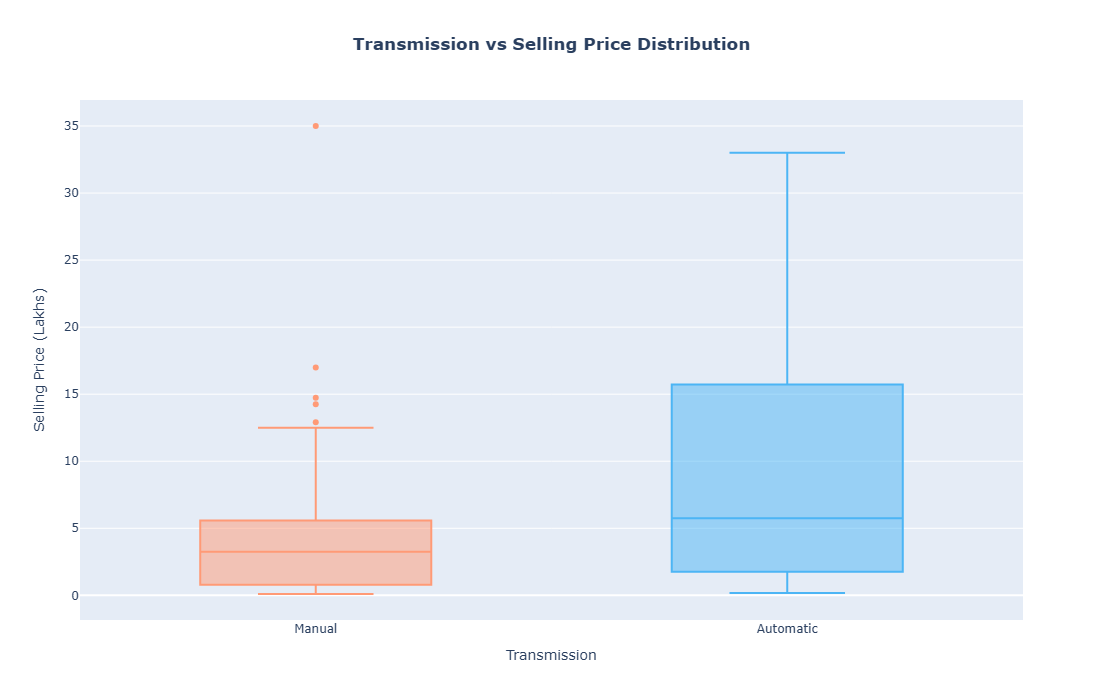

In [94]:
import plotly.express as px

fig = px.box(
    df_cleaned,
    x="Transmission",
    y="Selling_Price",
    color="Transmission",
    color_discrete_sequence=['#FF9A76', '#4CB5F5'],  # Orange/blue palette
    title="<b>Transmission vs Selling Price Distribution</b>",
    labels={"Selling_Price": "Selling Price (Lakhs)"},
    width=800,
    height=700
).update_layout(showlegend=False, title_x=0.5)
fig.show()

#### Number of Previous Owners

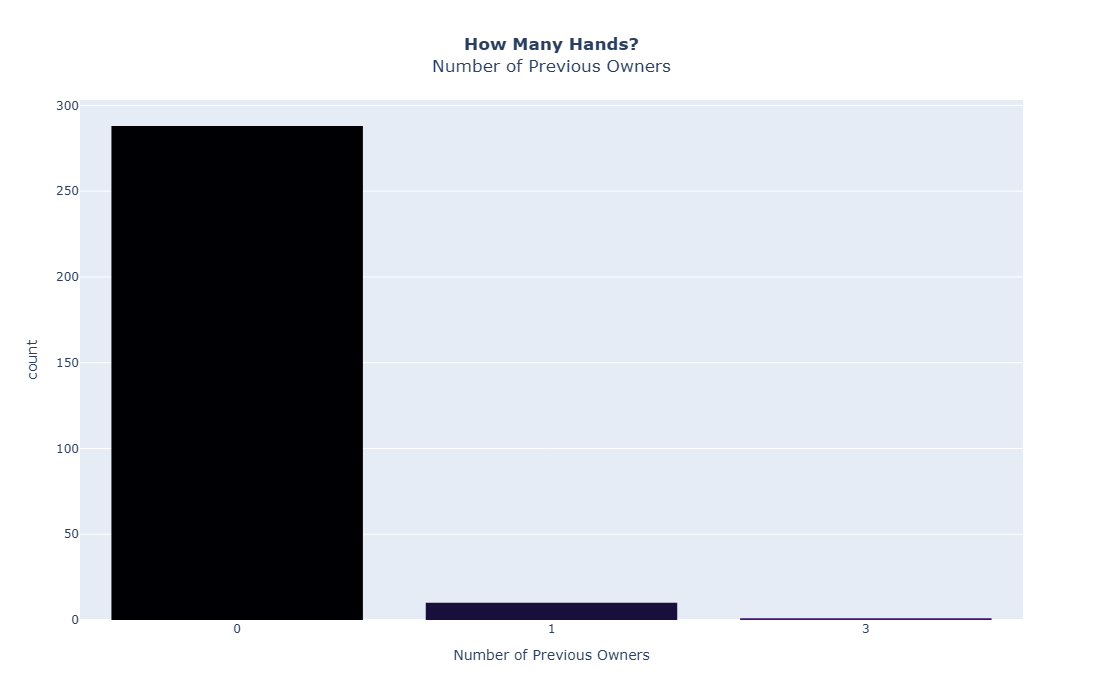

In [110]:
fig = px.histogram(
    df_cleaned,
    x='Owner',
    color='Owner',
    color_discrete_sequence=px.colors.sequential.Magma,
    title='<b>How Many Hands?</b><br>Number of Previous Owners',
    labels={'Owner': 'Number of Previous Owners', 'count': 'Count'},
    width=800,
    height=700,
    # Force categorical treatment:
    category_orders={"Owner": sorted(df_cleaned['Owner'].unique())}
)

# Additional formatting to ensure clean display
fig.update_layout(
    showlegend=False,
    title_x=0.5,
    xaxis=dict(
        type='category',  # Treat as categorical
        tickmode='array',
        tickvals=sorted(df_cleaned['Owner'].unique())  # Only show existing values
    ),
    bargap=0.2
)

fig.show()

#### Kms Driven vs Selling Price

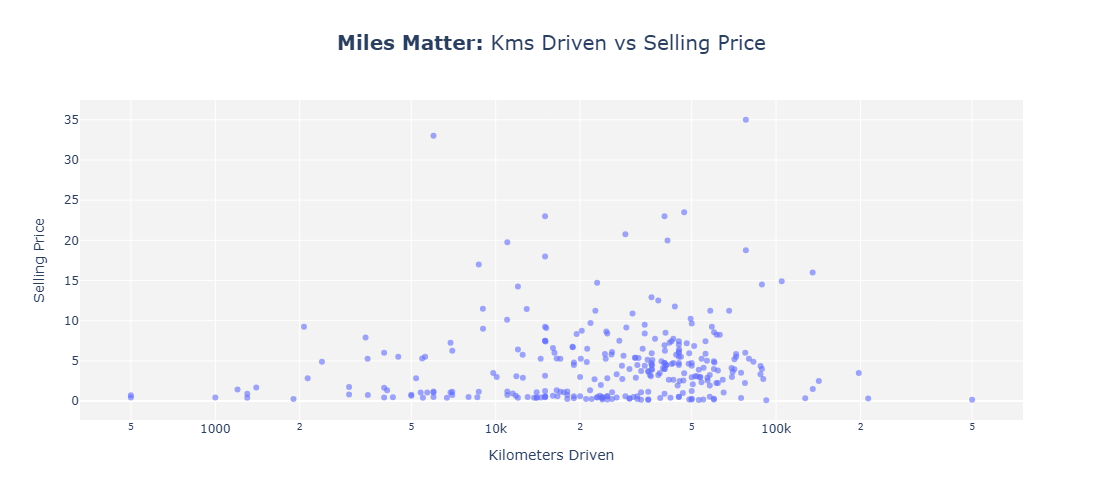

In [116]:
fig = px.scatter(
    df_cleaned,
    x='Kms_Driven',
    y='Selling_Price',
    opacity=0.6,
    title='<b>Miles Matter:</b> Kms Driven vs Selling Price',
    labels={
        'Kms_Driven': 'Kilometers Driven',
        'Selling_Price': 'Selling Price'
    },
    log_x=True,  # Logarithmic x-axis
    width=800,
    height=500
)

# Enhanced formatting
fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    hovermode='closest',
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    plot_bgcolor='rgba(240,240,240,0.8)'
)

# Add hover information
fig.update_traces(
    hovertemplate=(
        "<b>%{y:.2f}</b><br>"
        "Kms Driven: %{x:,.0f}<extra></extra>"
    )
)

fig.show()

#### Selling Price by Year

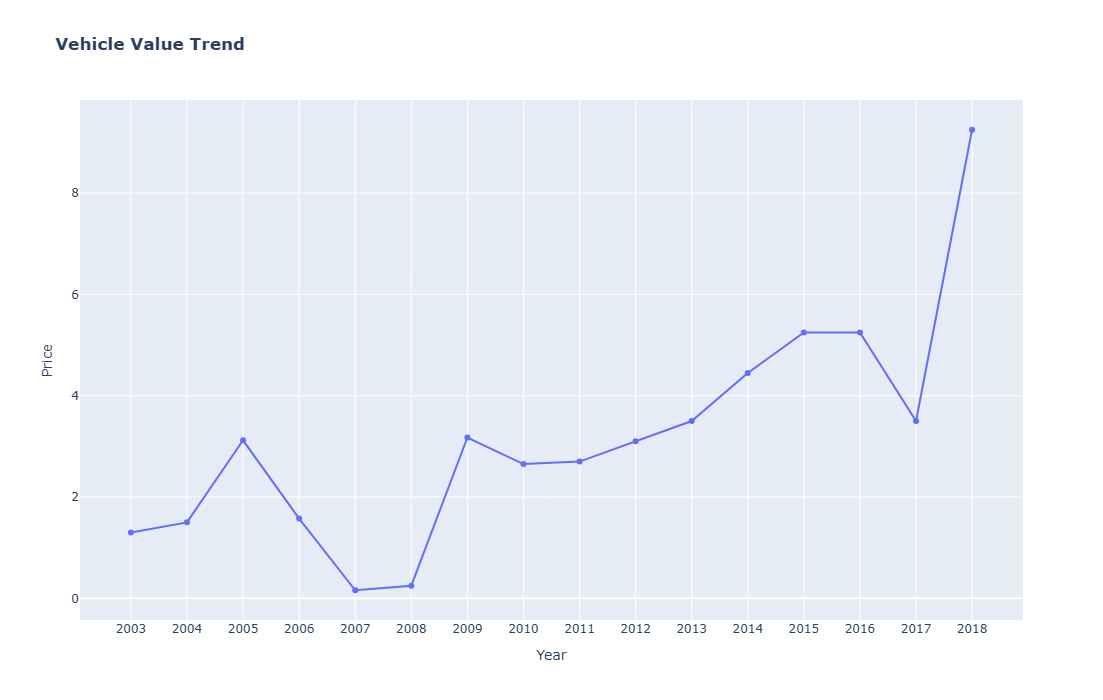

In [165]:
# Median price trend
median_prices = df_cleaned.groupby('Year')['Selling_Price'].median().reset_index()

fig = px.line(
    median_prices,
    x='Year',
    y='Selling_Price',
    title='<b>Vehicle Value Trend</b>',
    markers=True,
    width=800,
    height=700
)

# Add clean labels
fig.update_layout(
    yaxis_title="Price",
    xaxis=dict(dtick=1),
    showlegend=False
)

fig.show()

#### Yearly Listings Distribution

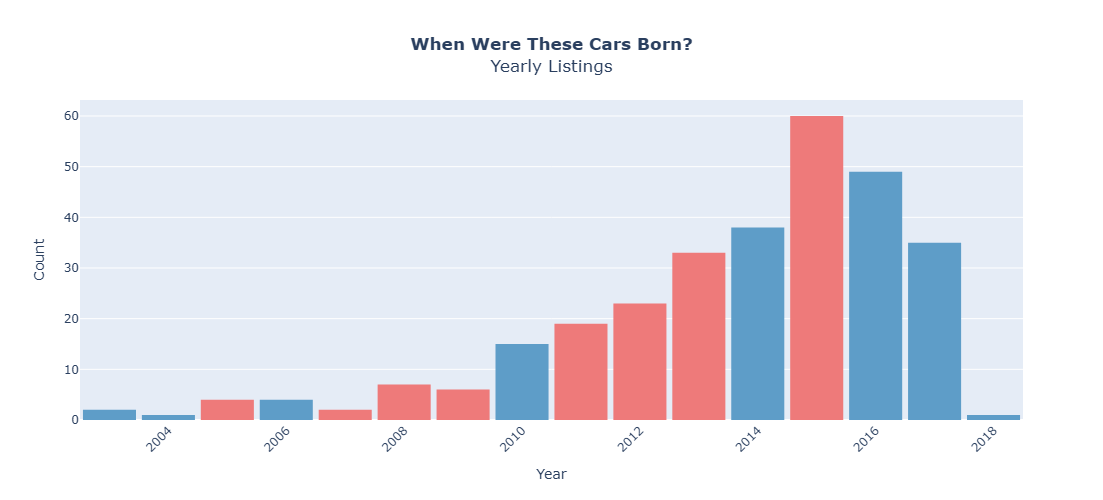

In [186]:
fig = px.histogram(
    df_cleaned,
    x='Year',
    color='Year',
    color_discrete_sequence=['#5e9dc8', '#ee7a7a'],  # Custom blue/red
    title='<b>When Were These Cars Born?</b><br>Yearly Listings',
    width=800,
    height=500
)

fig.update_layout(
    showlegend=False,
    xaxis_tickangle=-45,
    xaxis_title='Year',
    yaxis_title='Count',
    bargap=0.1,
    title_x=0.5
)

fig.show()

### Correlation Heatmap

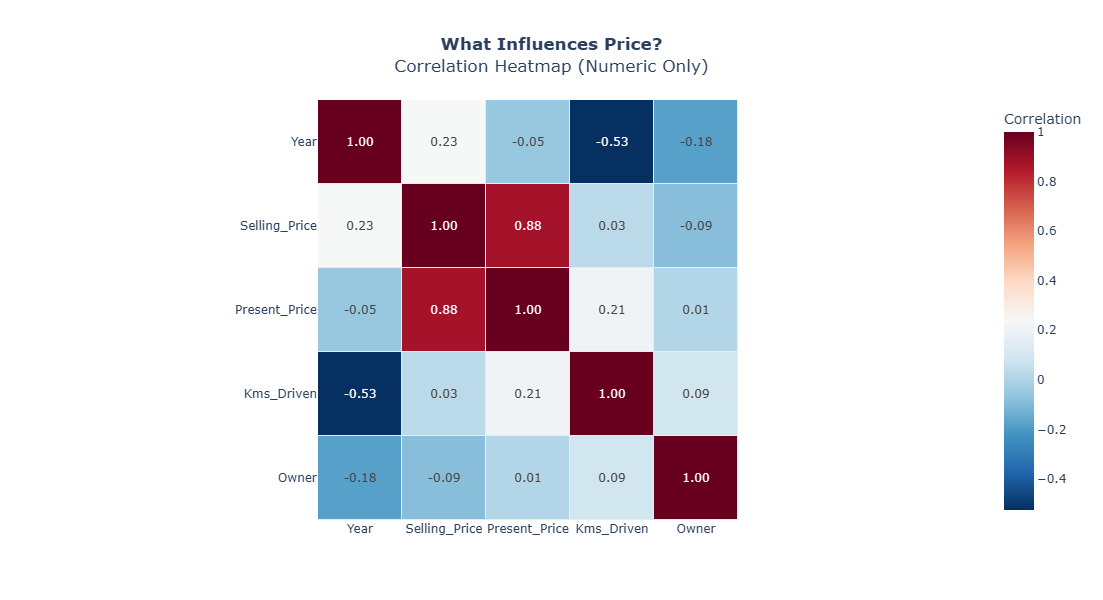

In [188]:
# Calculate correlations
corr_matrix = df_cleaned.select_dtypes(include=['number']).corr()

fig = px.imshow(
    corr_matrix,
    text_auto='.2f',  # Auto-format to 2 decimal places
    color_continuous_scale='RdBu_r',  # Plotly's reversed Red-Blue (matches coolwarm)
    title='<b>What Influences Price?</b><br>Correlation Heatmap (Numeric Only)',
    width=800,
    height=600
)

# Enhanced formatting
fig.update_layout(
    title_x=0.5,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    coloraxis_colorbar=dict(title='Correlation')
)

# Add white borders between cells
fig.update_traces(
    hovertemplate="<b>%{y} vs %{x}</b><br>Correlation: %{z:.2f}<extra></extra>",
    xgap=1,
    ygap=1
)

fig.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
